<a href="https://colab.research.google.com/github/MGhassen30798/Insight/blob/Prediction-using-Oct/Oct_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#from google.colab import files
#files.upload()  #this will prompt you to upload the kaggle.json

#!pip install -q kaggle
##!mkdir -p ~/.kaggle
#!cp kaggle.json ~/.kaggle/
#!ls ~/.kaggle
#!chmod 600 /root/.kaggle/kaggle.json   set permission
#Download required dataset / competition files to a folder of your choice
#!kaggle datasets download -d paultimothymooney/kermany2018
#from google.colab import drive
#drive.mount('/content/drive')
#import os
#!unzip -q /content/kermany2018.zip -d /content/drive/MyDrive/OcularDiseaseOCT

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<h1>2. Applying simple model </h1>

* A simple model with five convolution layer.
* kernel size = (5,5)

In [ ]:
import matplotlib.pyplot as plt
#from keras.applications.densenet import DenseNet121, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input
from keras.models import Model
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
#from generator import DataGenerator
import keras
from keras.callbacks import ModelCheckpoint

In [ ]:
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import keras
import os
from keras.layers import Dropout
import numpy as np
from keras.models import Sequential
from keras import backend as k

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


train model

In [ ]:
labels = os.listdir('/content/drive/MyDrive/OcularDiseaseOCT/OCT2017 /train')
train_datagen = ImageDataGenerator(samplewise_center=True, 
                              samplewise_std_normalization=True, 
                              horizontal_flip = True, 
                              vertical_flip = False, 
                              height_shift_range= 0.05, 
                              width_shift_range=0.1, 
                              rotation_range=15, 
                              zoom_range=0.15,
                                   validation_split=0.2)


NameError: ignored

In [ ]:
IMG_SIZE = 224
batch_size = 16
train_data_dir = '/content/drive/MyDrive/OcularDiseaseOCT/OCT2017 /train'
validation_data_dir = '/content/drive/MyDrive/OcularDiseaseOCT/OCT2017 /val'
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(IMG_SIZE , IMG_SIZE),
    batch_size=16,
    subset='training',
    class_mode='categorical')
valid_X, valid_Y = next(train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(IMG_SIZE , IMG_SIZE),
    batch_size=4000,
    subset='validation',
    class_mode='categorical'))

Found 49683 images belonging to 4 classes.
Found 12420 images belonging to 4 classes.


In [ ]:
t_x, t_y = next(train_generator)
fig, m_axs = plt.subplots(4, 4, figsize = (16, 16))
for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
    c_ax.imshow(c_x[:,:,0], cmap = 'bone')
    c_ax.set_title(', '.join([n_class for n_class, n_score in zip(labels, c_y) 
                             if n_score>0.5]))
    c_ax.axis('off')

NameError: ignored

In [ ]:
t_x.shape

(16, 224, 224, 3)

In [ ]:
Create Model "densnet"

In [ ]:
# defining densenet model
def conv_layer():
    model=Sequential()
    model.add(Conv2D(64,(5,5),activation='relu',input_shape=(224,224,3),kernel_initializer='he_normal'))
    #model.add(MaxPooling2D(pool_size=(2,2)))
    #model.add(Dropout(0.5))
    model.add(Conv2D(64,(5,5),activation='relu',padding='same',kernel_initializer='he_normal'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    #model.add(Dropout(0.5))
    model.add(Conv2D(32,(5,5),activation='relu',padding='same',kernel_initializer='he_normal'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    #model.add(Dropout(0.5))
    model.add(Conv2D(32,5,activation='relu',padding='same',kernel_initializer='he_normal'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    #model.add(Dropout(0.5))
    model.add(Conv2D(16,(5,5),activation='relu',padding='same',kernel_initializer='he_normal'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    #model.add(Dense(128,activation='relu',kernel_initializer='he_normal'))
    #model.add(Dropout(0.5))
    model.add(Dense(64,activation='relu',kernel_initializer='he_normal'))
    #model.add(Dropout(0.5))
    model.add(Dense(32,activation='relu',kernel_initializer='he_normal'))
    model.add(Dense(4,activation='softmax'))
    #model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    #history=model.fit(x_train,y_train,epochs=12,batch_size=128,verbose=1,validation_data=(x_test,y_test))
    return model

In [ ]:
# compiling model
model = conv_layer()
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
                           metrics = ['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("/content/drive/MyDrive/OcularDiseaseOCT/oct.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)


In [ ]:
# training the model
history = model.fit_generator(train_generator, 
                                  steps_per_epoch=100,
                                  validation_data = (valid_X,valid_Y), 
                                  epochs = 40,
                                  callbacks=[checkpoint])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/40
100/100 [==============================] - ETA: 0s - loss: 0.0028 - accuracy: 0.9987
Epoch 1: val_accuracy improved from -inf to 0.22550, saving model to /content/drive/MyDrive/OcularDiseaseOCT/oct.h5
100/100 [==============================] - 391s 4s/step - loss: 0.0028 - accuracy: 0.9987 - val_loss: 2842.1606 - val_accuracy: 0.2255
Epoch 2/40
100/100 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 2: val_accuracy did not improve from 0.22550
100/100 [==============================] - 310s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2842.6421 - val_accuracy: 0.2255
Epoch 3/40
100/100 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3: val_accuracy did not improve from 0.22550
100/100 [==============================] - 252s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2842.6421 - val_accuracy: 0.2255
Epoch 4/40
100/100 [==============================] - ETA: 0s - loss: 0.0

#TEST OCT

abnormal


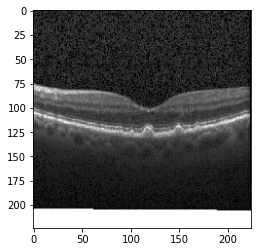

In [ ]:
from keras.preprocessing import image
img = image.load_img("/content/drive/MyDrive/OcularDiseaseOCT/oct2017/OCT2017 /test/DRUSEN/DRUSEN-1083159-1.jpeg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("/content/drive/MyDrive/OcularDiseaseOCT/oct.h5")
output = saved_model.predict(img)
#print(str(output[0][0]) + " /  "+str(output[0][1]))
if output[0][0] > output[0][1]:
    print("normal")
else:
    print('abnormal')

In [ ]:
# creating checkpoint
filepath="/content/drive/MyDrive/OcularDiseaseOCT/oct.h5"
#checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
#callbacks_list = [checkpoint]

In [ ]:
# loading the model with best weight
#model = dense_model()
model.load_weights(filepath)

NameError: ignored

In [ ]:
# creating test data
test_X, test_Y = next(train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(IMG_SIZE , IMG_SIZE),
    batch_size=8000,
    subset='validation',
    class_mode='categorical'))

NameError: ignored

In [ ]:
# predicting y value
y_pred = model.predict(test_X)

In [ ]:
pred_class = []
for i in range(len(y_pred)):
    pred_class.append(np.argmax(y_pred[i]))

In [ ]:
actual_class = []
for i in range(len(test_Y)):
    actual_class.append(np.argmax(test_Y[i]))

In [ ]:
#  accuracy score
from sklearn.metrics import accuracy_score
print('accuracy = ',accuracy_score(pred_class,actual_class))

In [ ]:
# defining confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [0,1,2,3]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

-------------------- Confusion matrix --------------------


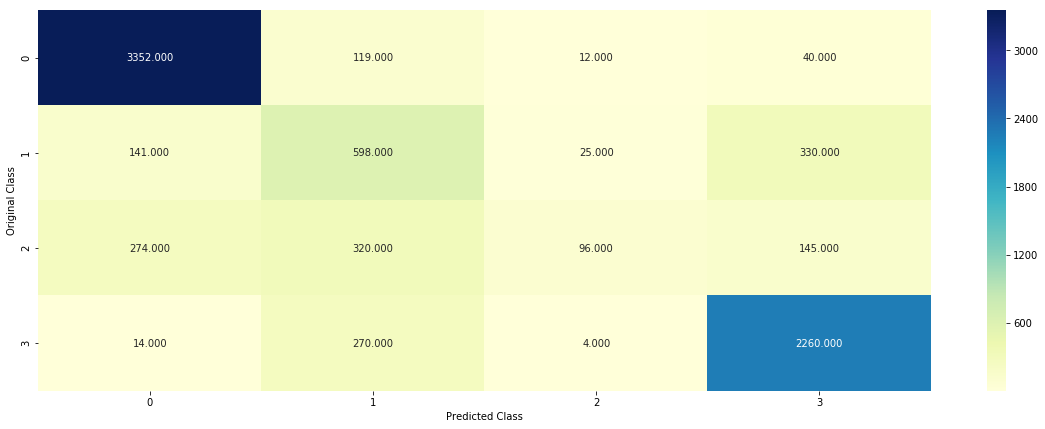

-------------------- Precision matrix (Columm Sum=1) --------------------


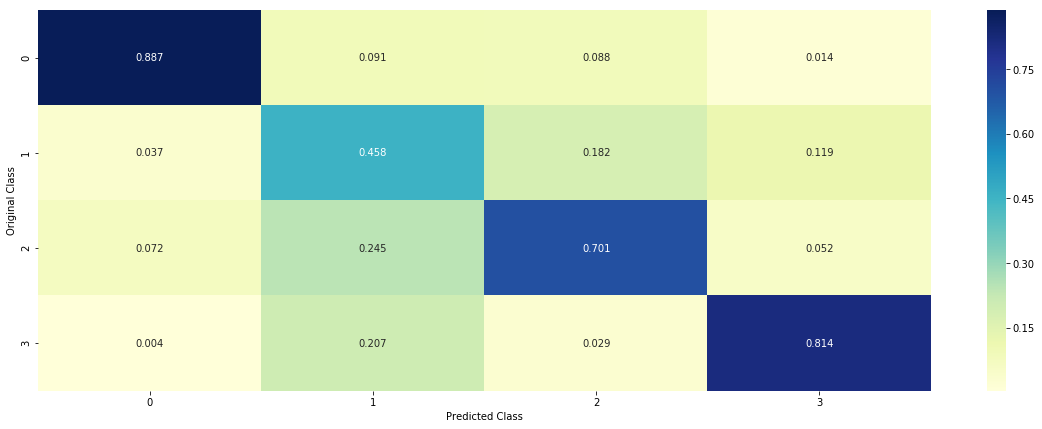

-------------------- Recall matrix (Row sum=1) --------------------


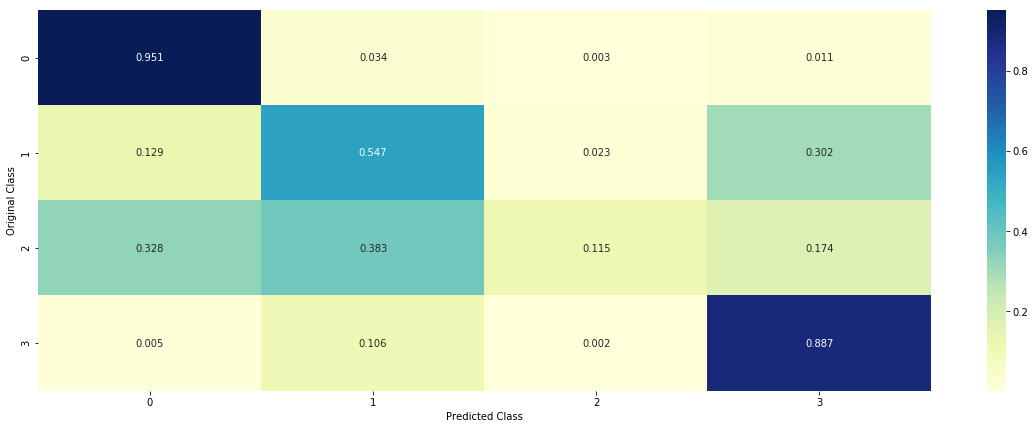

In [ ]:
plot_confusion_matrix(actual_class,pred_class)